# ***import*** ***libraries***

In [2]:
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# ***Data*** ***import***

In [50]:
#read Data

df = yf.download("BTC-USD", start="2010-01-01", end="2024-01-01")
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# ***create new columns***

In [51]:
df["Tolerance"]  = df["High"] - df["Low"]
df["Benefit"]  = df["Open"] - df["Close"]
df["Tomorrow"] =  df["Close"].shift(-1)
df.head()
df.dropna(inplace=True)

# ***split Dataset***

In [52]:
#parameters

X = df[["Open",	"High"	,"Low"	,"Volume", "Tolerance",	"Benefit"]]

y = df["Tomorrow"]


df.dropna(inplace=True)

#split Data

x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.2, shuffle=False )




# ***import Linearregression model***

In [53]:
#model

model = LinearRegression()
model.fit(x_train,y_train)



LinearRegression()

# ***predict section***

In [54]:
#predict

all_pred =  model.predict(X)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

# ***calculate RMSE***

In [55]:
#Rmse

rmse_all = np.sqrt(mean_squared_error(y, all_pred))
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))


In [56]:
print(f'rmse all: {rmse_all}')
print(f'rmse train: {rmse_train}')
print(f'rmse test: {rmse_test}')

rmse all: 1133.5892344077495
rmse train: 12.528473891207867
rmse test: 1267.282422643045


# visualization real Data vs  model Predict



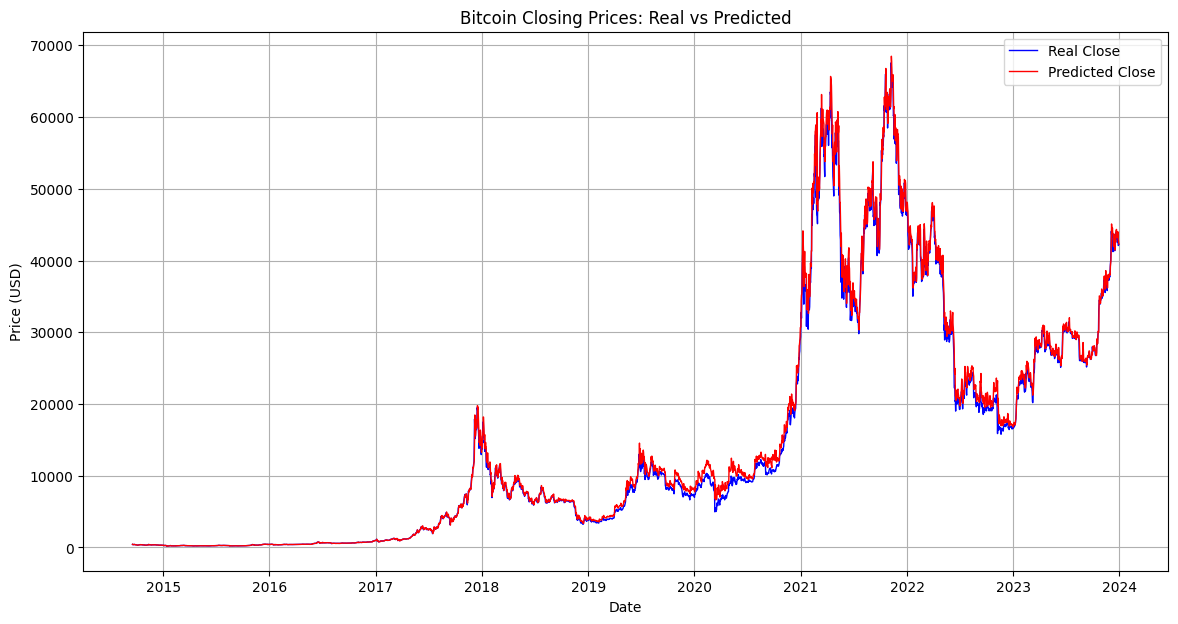

In [57]:
#visualization

plt.figure(figsize=(14, 7))
plt.plot(df.index, y, label="Real Close", color='blue', linewidth=1)
plt.plot(df.index, all_pred, label="Predicted Close", color='red', linewidth=1)
plt.title('Bitcoin Closing Prices: Real vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# ***model testing***

In [58]:
#test model


model.predict([[61414.81,	62148.37,	59836.53, 31753030589, 2311.840000000004,	734.7200000000012]])
#real close : 58116.98
#predict close : 61142.70



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([61142.70679667])

In [61]:
model.predict([[58033.88,	59359.43,	57178.41, 26175260526,2181.019999999997 ,291.3799999999974]])
# real close: 57344.91
# predict close : 57837.267

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57837.26733668])

**powered by Miracle⚡️**